## XRD Data Analysis

### Overview

This Jupyter Notebook is created for the analysis of X-ray Diffraction (XRD) data in the field of material characterization. The data used in this analysis is sourced from my research work at IITM

#### Notebook Information

- **Creator:** Aman Kumar Shah
- **Date Created:** 30/12/2023
- **GitHub Repository:** [Analytical_Insights_with_Python-AIP](https://github.com/Amanshah383/Analytical_Insights_with_Python-AIP-)

#### Data Information

- **Data Source:** XRD_Sample_Data.txt
- **Format:** Text file (.txt)

### Analysis Steps
- [1 - Data Loading and Exploration](#1)
- [2 - Plotting the Data as Line Graph](#2)
- [3 - Peak Detection and Plotting with the peaks](#3)
- [4 - Smoothing the curve, filtering the Noise](#4)

#### Notes

- This notebook is intended for educational and analytical purposes.


<a name='1'></a>
### 1 - Data Loading and Exploration

In [11]:
# Importing the required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from peakdetect import peakdetect
from scipy.signal import find_peaks
from matplotlib.ticker import MultipleLocator

%matplotlib inline

In [12]:
# Loading the data to data frame
df = pd.read_csv("A2_XRD_Sample_Data.txt", delimiter='\t', names=['2 theta', 'Intensity(a.u)'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2 theta         7501 non-null   float64
 1   Intensity(a.u)  7501 non-null   float64
dtypes: float64(2)
memory usage: 117.3 KB


In [13]:
df.head()

,2 theta,Intensity(a.u)
0,5.00,72059.2
1,5.01,72928.3
2,5.02,72520.0
3,5.03,72881.7
4,5.04,72706.7


<a name='2'></a>
### 2 - Plotting the Data as Line Graph



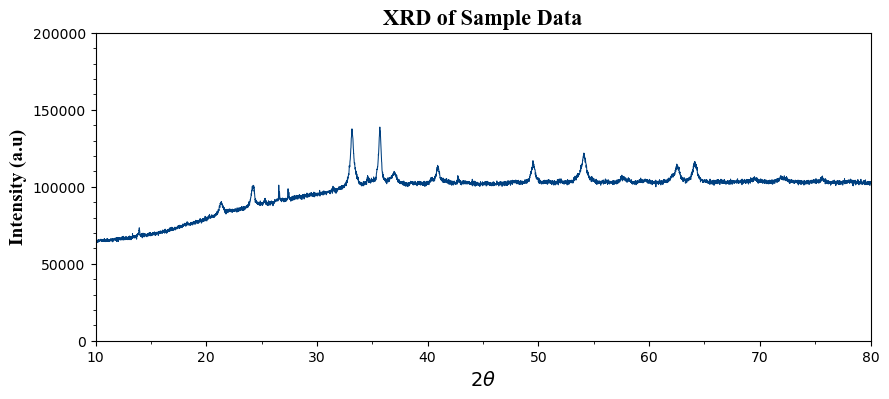

In [14]:
# Adjust the figsize to your desired dimensions
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(df["2 theta"], df["Intensity(a.u)"], linestyle='-', color="#004080", linewidth = 0.75)
ax.set_xlim(10, 80)
ax.set_ylim(0, 200000)

# Set title and axis labels with custom font (Times New Roman)
font_properties_title = {'family': 'Times New Roman', 'size': 16, 'weight': 'bold'}
font_properties_axis = {'family': 'Times New Roman', 'size': 14, 'weight': 'bold'}

ax.set_title("XRD of Sample Data", fontdict=font_properties_title)
ax.set_xlabel(r'$2 \theta$', fontdict=font_properties_axis)
ax.set_ylabel('Intensity (a.u)', fontdict=font_properties_axis)

# Adjust major and minor ticks on the x-axis
ax.xaxis.set_major_locator(MultipleLocator(10))  
ax.xaxis.set_minor_locator(MultipleLocator(5)) 

# Adjust major and minor ticks on the y-axis
ax.yaxis.set_major_locator(MultipleLocator(50000))  
ax.yaxis.set_minor_locator(MultipleLocator(10000))  

plt.show()


### 3 - Peak Detection and Plotting with the peaks

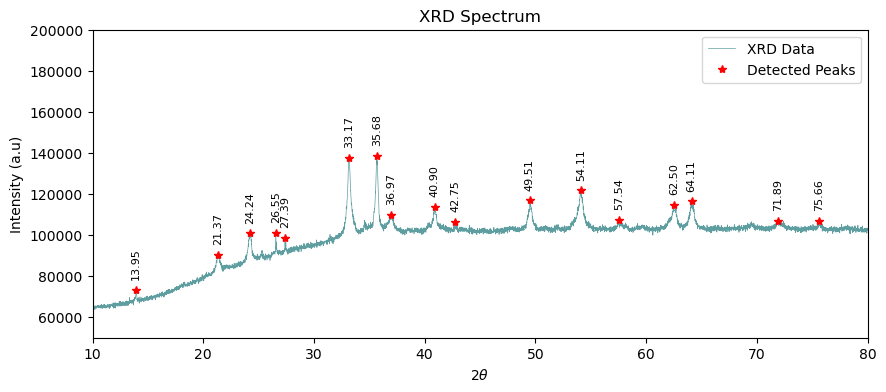

,Index,2 Theta,Intensity
0,895.0,13.95,73342.5
1,1637.0,21.37,90410.8
2,1924.0,24.24,100899.0
3,2155.0,26.55,101045.0
4,2239.0,27.39,98670.8
5,2817.0,33.17,137492.0
6,3068.0,35.68,138740.0
7,3197.0,36.97,109958.0
8,3590.0,40.90,113896.0
9,3775.0,42.75,106534.0


In [15]:
data = df["Intensity(a.u)"].values

# Detect peaks using peakdetect
peaks = peakdetect(data, lookahead=50, delta=5000)
Detected_Peaks = np.array(peaks[0])  # Use the first array for upper peaks

# Create a new DataFrame for detected peaks
peaks_df = pd.DataFrame(Detected_Peaks, columns=["Index", "Intensity"])

# Add "2 Theta" column to peaks_df
peaks_df["2 Theta"] = df.iloc[peaks_df["Index"].astype(int), 0].values

# Rearrange the columns
peaks_df = peaks_df[['Index', '2 Theta', 'Intensity']]

# Plot the original XRD data
plt.plot(df["2 theta"], data, label='XRD Data', color='cadetblue', linestyle='-', linewidth=0.5)
plt.xlabel(r'$2 \theta$')
plt.ylabel('Intensity (a.u)')
plt.title('XRD Spectrum')
plt.xlim(10, 80)
plt.ylim(50000, 200000)

# Plot detected peaks in red
plt.plot(df.iloc[Detected_Peaks[:, 0], 0], Detected_Peaks[:, 1], 'r*', label='Detected Peaks')

# Add data labels for detected peaks (2 Theta values)
for i, txt in enumerate(peaks_df["2 Theta"]):
    plt.text(peaks_df.iloc[i]["2 Theta"], peaks_df.iloc[i]["Intensity"] + 5000, 
    f'{txt:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)

# Increase the width of the plot
plt.gcf().set_size_inches(10, 4)

# Add legend
plt.legend()

# Show the plot
plt.show()

# Print the coordinates of detected peaks
peaks_df


### 4 - Smoothing the curve, filtering the Noise